<a href="https://colab.research.google.com/github/DishaJillella/AI-powered-Crop-Price-Prediction/blob/main/Agri_Price_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('agridata.csv',na_values='=')
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22


Handling null values

In [ ]:
df.isnull().sum()

,0
commodity_name,1
state,0
district,0
market,0
min_price,1
max_price,1
modal_price,1
date,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836977 entries, 0 to 836976
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836976 non-null  object 
 1   state           836977 non-null  object 
 2   district        836977 non-null  object 
 3   market          836977 non-null  object 
 4   min_price       836976 non-null  float64
 5   max_price       836976 non-null  float64
 6   modal_price     836976 non-null  float64
 7   date            836976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 51.1+ MB


In [ ]:
data = df.head(600000)

In [ ]:
data.dropna()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22
...,...,...,...,...,...,...,...,...
599995,Groundnut,Karnataka,Gadag,Laxmeshwar,23.99,57.99,48.99,2021-03-16
599996,Orange,Uttar Pradesh,Agra,Agra,29.00,32.00,30.80,2021-03-08
599997,Pumpkin,Himachal Pradesh,Kangra,Kangra(Baijnath),16.00,16.00,16.00,2021-03-06
599998,Tinda,Punjab,kapurthala,Phagwara,20.00,27.83,26.30,2021-04-22


In [ ]:
data.isnull().sum()

,0
commodity_name,0
state,0
district,0
market,0
min_price,0
max_price,0
modal_price,0
date,0


Adding Month Column

In [ ]:
data["date"][20]

'2019-05-22'

In [ ]:
str = data["date"][1]
str = str.split('-')
str

['2019', '05', '22']

In [ ]:
Dict = {1:'January',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [ ]:
monthtocol = []
for d in data["date"]:
  str = d
  str2 = str.split('-')
  monthtocol.append(Dict[int(str2[1])])


In [ ]:
data["month_to_col"]=monthtocol
data["month_to_col"]

<ipython-input-12-a076da5495e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month_to_col"]=monthtocol


,month_to_col
0,May
1,May
2,May
3,May
4,May
...,...
599995,March
599996,March
599997,March
599998,April


Adding Season Column

In [ ]:
data["month_to_col"].unique

<bound method Series.unique of 0           May
1           May
2           May
3           May
4           May
          ...  
599995    March
599996    March
599997    March
599998    April
599999    March
Name: month_to_col, Length: 600000, dtype: object>

In [ ]:
season = []
for tt in data["month_to_col"]:
  if tt == "January" or tt == "Feb":
    season.append("Winter")
  elif tt == "March" or tt == "April":
    season.append("Spring")
  elif tt == "May" or tt == "June":
    season.append("Summer")
  elif tt == "July" or tt == "August":
    season.append("Rainy")
  elif tt == "September" or tt == "October":
    season.append("Autumn")
  elif tt == "November" or tt == "December":
    season.append("pre Winter")


In [ ]:
data["season"] = season


<ipython-input-15-91a11447c295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["season"] = season


Adding Day of the Week

In [ ]:
day_of_week = []
for r in data["date"]:
  df = pd.Timestamp(r)
  day = df.dayofweek
  day_of_week.append(day)

In [ ]:
data["day"] = day_of_week

In [ ]:
data.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,May,Summer,2
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22,May,Summer,2
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22,May,Summer,2
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22,May,Summer,2
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22,May,Summer,2


Removing Non Agri-Horticulture Commodities

In [ ]:
unique_values = data['commodity_name'].unique()


In [ ]:
unique_values

array(['Ajwan', 'Alasande+Gram', 'Amaranthus', 'Amla(Nelli+Kai)',
       'Amphophalus', 'Antawala', 'Apple', 'Arhar+Dal(Tur+Dal)',
       'Ashgourd', 'Avare+Dal', 'Banana', 'Banana+-+Green',
       'Barley+(Jau)', 'Beans', 'Beaten+Rice', 'Beetroot', 'Betal+Leaves',
       'Bitter+gourd', 'Black+pepper', 'Bottle+gourd', 'Brinjal',
       'Broken+Rice', 'Cabbage', 'Capsicum', 'Cardamoms', 'Carrot',
       'Cashewnuts', 'Castor+Seed', 'Cauliflower', 'Coconut',
       'Chapparad+Avare', 'Chennangi+Dal', 'Chikoos(Sapota)', 'Chili+Red',
       'Chilly+Capsicum', 'Cloves', 'Cluster+beans', 'Cocoa',
       'Coconut+Oil', 'Coconut+Seed', 'Coffee', 'Colacasia', 'Copra',
       'Coriander(Leaves)', 'Corriander+seed', 'Cowpea(Veg)', 'Cotton',
       'Cucumbar(Kheera)', 'Cummin+Seed(Jeera)', 'Drumstick',
       'Dry+Chillies', 'Dry+Fodder', 'Dry+Grapes', 'Duster+Beans', 'Egg',
       'Elephant+Yam+(Suran)', 'Field+Pea', 'Firewood', 'Fish', 'Garlic',
       'Ghee', 'Gingelly+Oil', 'Ginger(Dry)', 'Gi

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df' and the commodity names are in a column named 'commodity_name'

# List of commodities to be removed
commodities_to_remove = [
    'Egg', 'Fish', 'Hen', 'Goat', 'Cow', 'Sheep', 'She Buffalo', 'Duck', 'Ox',
    'Cock', 'Pigs', 'Calf', 'Ram', 'Bull', 'He Buffalo', 'Butter', 'Khoya',
    'Lint', 'Dalda', 'Rose (Loose)', 'Marigold (loose)', 'Marigold (Calcutta)',
    'Jasmine', 'Chrysanthemum (Loose)', 'Cotton Seed', 'Sabu Dan',
    'Persimon (Japani Fal)', 'Walnut', 'Seemebadnekai', 'Seetapal',
    'Almond (Badam)', 'Niger Seed (Ramtil)', 'Neem Seed', 'Tamarind Seed','She+Goat'
    'Honge Seed', 'Hippe Seed', 'Ambada Seed', 'Indian Colza (Sarson)','She+Buffalo'
    'Bran', 'Ghee', 'Gingelly Oil', 'Groundnut Oil', 'Coconut Oil','Elephant+Yam+(Suran)','He+Buffalo'
]

# Remove rows with these commodities
df_filtered = data[~data['commodity_name'].isin(commodities_to_remove)]

# Optionally, reset the index after removing the rows
df_filtered.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df_filtered)




            commodity_name             state    district            market  \
0                    Ajwan           Gujarat      Amreli            Amreli   
1                    Ajwan           Gujarat  Banaskanth           Dhanera   
2                    Ajwan           Gujarat    Jamnagar          Jamnagar   
3                    Ajwan           Gujarat     Mehsana              Kadi   
4                    Ajwan           Gujarat     Mehsana             Unjha   
...                    ...               ...         ...               ...   
596909           Groundnut         Karnataka       Gadag        Laxmeshwar   
596910              Orange     Uttar Pradesh        Agra              Agra   
596911             Pumpkin  Himachal Pradesh      Kangra  Kangra(Baijnath)   
596912               Tinda            Punjab  kapurthala          Phagwara   
596913  Cummin+Seed(Jeera)         Karnataka       Gadag             Gadag   

        min_price  max_price  modal_price        date month_to_

In [ ]:
p=df_filtered['commodity_name'].unique()
p

array(['Ajwan', 'Alasande+Gram', 'Amaranthus', 'Amla(Nelli+Kai)',
       'Amphophalus', 'Antawala', 'Apple', 'Arhar+Dal(Tur+Dal)',
       'Ashgourd', 'Avare+Dal', 'Banana', 'Banana+-+Green',
       'Barley+(Jau)', 'Beans', 'Beaten+Rice', 'Beetroot', 'Betal+Leaves',
       'Bitter+gourd', 'Black+pepper', 'Bottle+gourd', 'Brinjal',
       'Broken+Rice', 'Cabbage', 'Capsicum', 'Cardamoms', 'Carrot',
       'Cashewnuts', 'Castor+Seed', 'Cauliflower', 'Coconut',
       'Chapparad+Avare', 'Chennangi+Dal', 'Chikoos(Sapota)', 'Chili+Red',
       'Chilly+Capsicum', 'Cloves', 'Cluster+beans', 'Cocoa',
       'Coconut+Oil', 'Coconut+Seed', 'Coffee', 'Colacasia', 'Copra',
       'Coriander(Leaves)', 'Corriander+seed', 'Cowpea(Veg)', 'Cotton',
       'Cucumbar(Kheera)', 'Cummin+Seed(Jeera)', 'Drumstick',
       'Dry+Chillies', 'Dry+Fodder', 'Dry+Grapes', 'Duster+Beans',
       'Field+Pea', 'Firewood', 'Garlic', 'Gingelly+Oil', 'Ginger(Dry)',
       'Ginger(Green)', 'Grapes', 'Green+Avare+(W)', 'Gre

In [ ]:
# Get the list of unique markets
market_list = df_filtered['market'].unique()
print(len(market_list))
# Print the unique markets
print("Unique markets:", market_list)


2274
Unique markets: ['Amreli' 'Dhanera' 'Jamnagar' ... 'Simariya' 'Hingna' 'Bori']


In [ ]:
df_filtered.head(10)

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,May,Summer,2
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22,May,Summer,2
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22,May,Summer,2
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22,May,Summer,2
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22,May,Summer,2
5,Ajwan,Madhya Pradesh,Neemuch,Neemuch,80.00,132.00,95.00,2019-05-22,May,Summer,2
6,Ajwan,Rajasthan,Chittorgarh,Nimbahera,9.77,9.95,9.80,2019-05-22,May,Summer,2
7,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,100.50,120.90,110.70,2019-05-22,May,Summer,2
8,Alasande+Gram,Karnataka,Bagalkot,Bagalakot,46.01,46.50,46.46,2019-05-22,May,Summer,2
9,Alasande+Gram,Karnataka,Bangalore,Bangalore,48.00,53.00,50.50,2019-05-22,May,Summer,2


In [ ]:
df_filtered.shape


(596914, 11)

# Handling Outliers

In [ ]:
data2 = df_filtered.head(596914)

<Axes: ylabel='modal_price'>

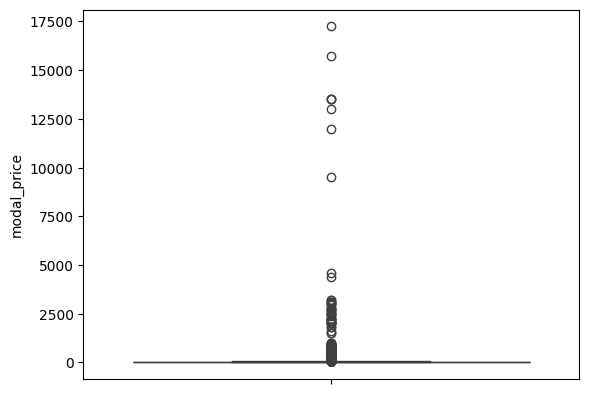

In [ ]:
sns.boxplot(data2["modal_price"])

In [ ]:
# Boxplot for modal_price in df_filtered
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df_filtered['modal_price'])
plt.title('Boxplot of Modal Price')

# Distribution plot for modal_price in df_filtered
plt.subplot(1, 2, 2)
sns.histplot(df_filtered['modal_price'], kde=True)
plt.title('Distribution of Modal Price')

plt.tight_layout()
plt.show()

In [ ]:
print(df_filtered['modal_price'].describe())

count    596914.000000
mean         31.665896
std          60.960599
min           0.010000
25%          15.000000
50%          23.000000
75%          39.700000
max       17250.000000
Name: modal_price, dtype: float64


In [ ]:
import pandas as pd

#Q1 (25th percentile) and Q3 (75th percentile) for modal_price
Q1 = df_filtered['modal_price'].quantile(0.25)
Q3 = df_filtered['modal_price'].quantile(0.75)
IQR = Q3 - Q1

# outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered_no_outliers = df_filtered[(df_filtered['modal_price'] >= lower_bound) & (df_filtered['modal_price'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Original dataset size: {df_filtered.shape[0]}")
print(f"Filtered dataset size: {df_filtered_no_outliers.shape[0]}")

# Display the cleaned DataFrame
print(df_filtered_no_outliers)


Original dataset size: 596914
Filtered dataset size: 562852
       commodity_name             state     district            market  \
6               Ajwan         Rajasthan  Chittorgarh         Nimbahera   
8       Alasande+Gram         Karnataka     Bagalkot         Bagalakot   
9       Alasande+Gram         Karnataka    Bangalore         Bangalore   
10      Alasande+Gram         Karnataka        Gadag        Laxmeshwar   
11      Alasande+Gram    Madhya Pradesh        Panna          Ajaygarh   
...               ...               ...          ...               ...   
596908         Orange            Punjab     Ferozpur    Firozepur City   
596909      Groundnut         Karnataka        Gadag        Laxmeshwar   
596910         Orange     Uttar Pradesh         Agra              Agra   
596911        Pumpkin  Himachal Pradesh       Kangra  Kangra(Baijnath)   
596912          Tinda            Punjab   kapurthala          Phagwara   

        min_price  max_price  modal_price        da

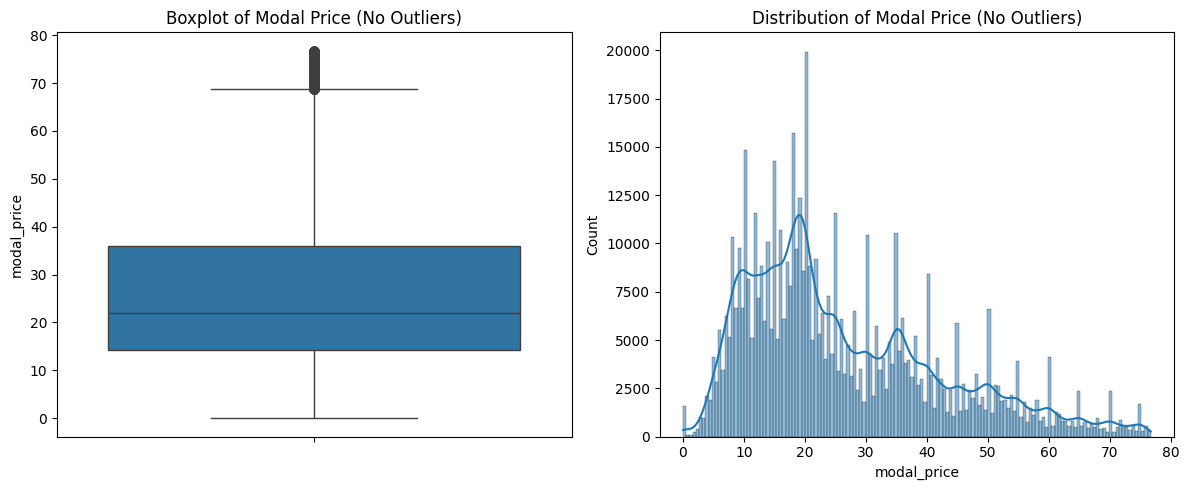

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for modal_price in the cleaned dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df_filtered_no_outliers['modal_price'])
plt.title('Boxplot of Modal Price (No Outliers)')

# Distribution plot for modal_price in the cleaned dataset
plt.subplot(1, 2, 2)
sns.histplot(df_filtered_no_outliers['modal_price'], kde=True)
plt.title('Distribution of Modal Price (No Outliers)')

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Calculate Z-scores
df_filtered_no_outliers['z_score'] = stats.zscore(df_filtered_no_outliers['modal_price'])

# Define outlier threshold
threshold = 3

# Detect outliers
outliers = df_filtered_no_outliers[(df_filtered_no_outliers['z_score'].abs() > threshold)]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])


Number of outliers: 2730
        modal_price   z_score
86             75.0  3.011315
125            75.0  3.011315
133            76.0  3.073369
139            75.5  3.042342
156            75.8  3.060958
...             ...       ...
595669         75.0  3.011315
596067         75.0  3.011315
596080         75.0  3.011315
596171         75.0  3.011315
596511         75.0  3.011315

[2730 rows x 2 columns]


<ipython-input-29-990e04d99340>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['z_score'] = stats.zscore(df_filtered_no_outliers['modal_price'])


In [ ]:
# Remove outliers
df_filtered_clean = df_filtered_no_outliers[df_filtered_no_outliers['z_score'].abs() <= 3]

# Print the size of the dataset before and after removing outliers
print(f"Original dataset size: {df_filtered_no_outliers.shape[0]}")
print(f"Cleaned dataset size: {df_filtered_clean.shape[0]}")
print("\nBasic Statistics After Removing Outliers:")
print(df_filtered_clean['modal_price'].describe())


Original dataset size: 562852
Cleaned dataset size: 560122

Basic Statistics After Removing Outliers:
count    560122.000000
mean         26.234324
std          15.787097
min           0.010000
25%          14.100000
50%          21.650000
75%          36.000000
max          74.800000
Name: modal_price, dtype: float64


In [ ]:
from scipy import stats

# Calculate Z-scores
df_filtered_clean['z_score'] = stats.zscore(df_filtered_clean['modal_price'])

# Define outlier threshold
threshold = 3

# Detect outliers
outliers = df_filtered_clean[(df_filtered_clean['z_score'].abs() > threshold)]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])

Number of outliers: 898
        modal_price   z_score
129           73.75  3.009782
143           74.00  3.025618
177           74.50  3.057289
180           74.00  3.025618
188           74.00  3.025618
...             ...       ...
591746        74.00  3.025618
593902        74.00  3.025618
593956        74.00  3.025618
595846        74.60  3.063623
596722        74.00  3.025618

[898 rows x 2 columns]


<ipython-input-31-2ce70306955a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean['z_score'] = stats.zscore(df_filtered_clean['modal_price'])


In [ ]:
# Remove new outliers
df_filtered_clean_2 = df_filtered_clean[df_filtered_clean['z_score'].abs() <= 3]

# Print the size of the dataset before and after removing new outliers
print(f"Size before removing new outliers: {df_filtered_clean.shape[0]}")
print(f"Size after removing new outliers: {df_filtered_clean_2.shape[0]}")

print("\nBasic Statistics After Removing New Outliers:")
print(df_filtered_clean_2['modal_price'].describe())


Size before removing new outliers: 560122
Size after removing new outliers: 559224

Basic Statistics After Removing New Outliers:
count    559224.000000
mean         26.157405
std          15.682540
min           0.010000
25%          14.010000
50%          21.590000
75%          35.900000
max          73.550000
Name: modal_price, dtype: float64


In [ ]:
# Calculate Z-scores
df_filtered_clean_2['z_score'] = stats.zscore(df_filtered_clean_2['modal_price'])

# Define outlier threshold
threshold = 3

# Detect outliers
outliers = df_filtered_clean_2[(df_filtered_clean_2['z_score'].abs() > threshold)]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])

Number of outliers: 285
        modal_price   z_score
99            73.50  3.018812
162           73.50  3.018812
168           73.50  3.018812
198           73.25  3.002871
237           73.50  3.018812
...             ...       ...
587889        73.40  3.012435
587936        73.25  3.002871
590946        73.40  3.012435
592644        73.33  3.007972
594468        73.40  3.012435

[285 rows x 2 columns]


<ipython-input-33-6f4f6792768c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_2['z_score'] = stats.zscore(df_filtered_clean_2['modal_price'])


In [ ]:
# Calculate Z-scores
df_filtered_clean_2['z_score'] = stats.zscore(df_filtered_clean_2['modal_price'])

# Define outlier threshold
threshold = 3

# Detect outliers
outliers = df_filtered_clean_2[(df_filtered_clean_2['z_score'].abs() > threshold)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])

# Remove outliers
df_filtered_clean_3 = df_filtered_clean_2[df_filtered_clean_2['z_score'].abs() <= 3]

# Size of the dataset before and after removing outliers
print(f"Original dataset size: {df_filtered_clean_2.shape[0]}")
print(f"Cleaned dataset size: {df_filtered_clean_3.shape[0]}")

# Some basic statistics
print("\nBasic Statistics After Removing Outliers:")
print(df_filtered_clean_3['modal_price'].describe())


Number of outliers: 285
        modal_price   z_score
99            73.50  3.018812
162           73.50  3.018812
168           73.50  3.018812
198           73.25  3.002871
237           73.50  3.018812
...             ...       ...
587889        73.40  3.012435
587936        73.25  3.002871
590946        73.40  3.012435
592644        73.33  3.007972
594468        73.40  3.012435

[285 rows x 2 columns]
Original dataset size: 559224
Cleaned dataset size: 558939

Basic Statistics After Removing Outliers:
count    558939.000000
mean         26.133303
std          15.650164
min           0.010000
25%          14.000000
50%          21.530000
75%          35.880000
max          73.200000
Name: modal_price, dtype: float64


<ipython-input-34-595e74558c21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_2['z_score'] = stats.zscore(df_filtered_clean_2['modal_price'])


In [ ]:
df_filtered_clean_3['z_score'] = stats.zscore(df_filtered_clean_3['modal_price'])
threshold = 3

# Detect outliers
outliers = df_filtered_clean_3[(df_filtered_clean_3['z_score'].abs() > threshold)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])


df_filtered_clean_4 = df_filtered_clean_3[df_filtered_clean_3['z_score'].abs() <= 3]

# Size of the dataset before and after removing outliers
print(f"Original dataset size: {df_filtered_clean_3.shape[0]}")
print(f"Cleaned dataset size: {df_filtered_clean_2.shape[0]}")

# Some basic statistics
print("\nBasic Statistics After Removing Outliers:")
print(df_filtered_clean_4['modal_price'].describe())

Number of outliers: 53
        modal_price   z_score
21242         73.20  3.007428
58043         73.10  3.001038
59283         73.10  3.001038
68112         73.20  3.007428
83400         73.10  3.001038
84356         73.15  3.004233
87362         73.10  3.001038
108863        73.20  3.007428
124211        73.20  3.007428
139234        73.10  3.001038
175655        73.20  3.007428
186017        73.20  3.007428
194110        73.20  3.007428
199843        73.20  3.007428
219315        73.20  3.007428
245331        73.10  3.001038
249996        73.20  3.007428
250268        73.20  3.007428
255881        73.09  3.000399
263887        73.20  3.007428
283391        73.10  3.001038
290381        73.20  3.007428
298659        73.20  3.007428
301370        73.20  3.007428
301515        73.15  3.004233
309911        73.20  3.007428
314927        73.10  3.001038
321271        73.10  3.001038
344450        73.18  3.006150
345816        73.10  3.001038
347249        73.20  3.007428
348643        73.

<ipython-input-35-9e2d56e36acf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_3['z_score'] = stats.zscore(df_filtered_clean_3['modal_price'])


In [ ]:
df_filtered_clean_4['z_score'] = stats.zscore(df_filtered_clean_4['modal_price'])
threshold = 3
# Detect outliers
outliers = df_filtered_clean_4[(df_filtered_clean_4['z_score'].abs() > threshold)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])

Number of outliers: 2
        modal_price   z_score
106966        73.08  3.001188
135859        73.07  3.000549


<ipython-input-36-bc54170faa6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_4['z_score'] = stats.zscore(df_filtered_clean_4['modal_price'])


In [ ]:
# Calculate Z-scores
df_filtered_clean_4['z_score'] = stats.zscore(df_filtered_clean_4['modal_price'])

# Check the range of Z-scores
print("Z-score range:")
print(df_filtered_clean_4['z_score'].describe())


Z-score range:
count    5.588860e+05
mean    -3.805421e-16
std      1.000001e+00
min     -1.669555e+00
25%     -7.752938e-01
50%     -2.946042e-01
75%      6.213908e-01
max      3.001188e+00
Name: z_score, dtype: float64


<ipython-input-37-bded14ff72a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_4['z_score'] = stats.zscore(df_filtered_clean_4['modal_price'])


In [ ]:
threshold = 3
outliers = df_filtered_clean_4[df_filtered_clean_4['z_score'].abs() > threshold]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['modal_price', 'z_score']])


Number of outliers: 2
        modal_price   z_score
106966        73.08  3.001188
135859        73.07  3.000549


In [ ]:
print(f"Shape before removing outliers: {df_filtered_clean_4.shape}")

df_cleaned = df_filtered_clean_4[df_filtered_clean_4['z_score'].abs() <= threshold]

df_cleaned = df_cleaned.drop(columns=['z_score'])

print(f"Shape after removing outliers: {df_cleaned.shape}")


Shape before removing outliers: (558886, 12)
Shape after removing outliers: (558884, 11)


In [ ]:
threshold = 3
outliers = df_cleaned[df_filtered_clean_4['z_score'].abs() > threshold]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 0


<ipython-input-40-721d569e0f1c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_cleaned[df_filtered_clean_4['z_score'].abs() > threshold]


In [ ]:
print(f"Number of duplicate rows: {df_filtered_clean_4.duplicated().sum()}")


Number of duplicate rows: 24


In [ ]:
duplicates = df_filtered_clean_4[df_filtered_clean_4.duplicated()]

print("Duplicate rows:")
duplicates.head(24)


Duplicate rows:


,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
14951,Bitter+gourd,Meghalaya,West Garo Hills,Rongram,40.00,45.00,42.00,2019-05-24,May,Summer,4,1.014508
17042,Brinjal,Meghalaya,West Garo Hills,Rongram,30.00,40.00,35.00,2019-05-24,May,Summer,4,0.567058
19880,Coriander(Leaves),NCT of Delhi,Delhi,Azadpur,10.00,14.00,12.00,2019-05-24,May,Summer,4,-0.903137
20096,Cowpea(Veg),Meghalaya,West Garo Hills,Rongram,30.00,35.00,32.00,2019-05-24,May,Summer,4,0.375293
20372,Cucumbar(Kheera),Meghalaya,West Garo Hills,Rongram,25.00,28.00,26.00,2019-05-24,May,Summer,4,-0.008236
20373,Cucumbar(Kheera),Meghalaya,East Khasi Hills,Shillong,12.00,15.00,13.00,2019-05-24,May,Summer,4,-0.839215
20378,Cucumbar(Kheera),NCT of Delhi,Delhi,Azadpur,3.00,10.00,5.67,2019-05-24,May,Summer,4,-1.307760
21108,Field+Pea,Meghalaya,East Khasi Hills,Shillong,30.00,45.00,39.50,2019-05-24,May,Summer,4,0.854704
21555,Ginger(Dry),Meghalaya,West Garo Hills,Rongram,48.00,50.00,49.00,2019-05-24,May,Summer,4,1.461958
23192,Guar,NCT of Delhi,Delhi,Azadpur,24.00,28.00,26.00,2019-05-24,May,Summer,4,-0.008236


In [ ]:
import pandas as pd
duplicates_all_columns = df_filtered_clean_4[df_filtered_clean_4.duplicated(keep=False)]

print("Duplicates based on all columns:")
duplicates_all_columns




Duplicates based on all columns:


,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
12538,Bitter+gourd,Meghalaya,West Garo Hills,Rongram,40.00,45.00,42.00,2019-05-24,May,Summer,4,1.014508
12886,Raddish,NCT of Delhi,Delhi,Azadpur,3.75,10.00,6.33,2019-05-24,May,Summer,4,-1.265572
13126,Brinjal,Meghalaya,West Garo Hills,Rongram,30.00,40.00,35.00,2019-05-24,May,Summer,4,0.567058
13601,Cowpea(Veg),Meghalaya,West Garo Hills,Rongram,30.00,35.00,32.00,2019-05-24,May,Summer,4,0.375293
13760,Cucumbar(Kheera),Meghalaya,West Garo Hills,Rongram,25.00,28.00,26.00,2019-05-24,May,Summer,4,-0.008236
13761,Cucumbar(Kheera),Meghalaya,East Khasi Hills,Shillong,12.00,15.00,13.00,2019-05-24,May,Summer,4,-0.839215
14150,Field+Pea,Meghalaya,East Khasi Hills,Shillong,30.00,45.00,39.50,2019-05-24,May,Summer,4,0.854704
14318,Turnip,NCT of Delhi,Delhi,Azadpur,20.00,30.00,25.00,2019-05-24,May,Summer,4,-0.072157
14323,Ginger(Dry),Meghalaya,West Garo Hills,Rongram,48.00,50.00,49.00,2019-05-24,May,Summer,4,1.461958
14547,Water+Melon,NCT of Delhi,Delhi,Azadpur,3.00,8.00,5.50,2019-05-24,May,Summer,4,-1.318626


In [ ]:
df_cleaned_no_duplicates = df_filtered_clean_4.drop_duplicates(keep='first')

print(f"Shape after removing exact duplicates: {df_cleaned_no_duplicates.shape}")
print("Cleaned DataFrame:")
print(df_cleaned_no_duplicates)


Shape after removing exact duplicates: (558862, 12)
Cleaned DataFrame:
       commodity_name             state     district            market  \
6               Ajwan         Rajasthan  Chittorgarh         Nimbahera   
8       Alasande+Gram         Karnataka     Bagalkot         Bagalakot   
9       Alasande+Gram         Karnataka    Bangalore         Bangalore   
10      Alasande+Gram         Karnataka        Gadag        Laxmeshwar   
11      Alasande+Gram    Madhya Pradesh        Panna          Ajaygarh   
...               ...               ...          ...               ...   
596908         Orange            Punjab     Ferozpur    Firozepur City   
596909      Groundnut         Karnataka        Gadag        Laxmeshwar   
596910         Orange     Uttar Pradesh         Agra              Agra   
596911        Pumpkin  Himachal Pradesh       Kangra  Kangra(Baijnath)   
596912          Tinda            Punjab   kapurthala          Phagwara   

        min_price  max_price  modal_pric

In [ ]:
initial_duplicates_count = df_filtered_clean_4.duplicated(keep=False).sum()
final_duplicates_count = df_cleaned_no_duplicates.duplicated(keep=False).sum()

print(f"Number of duplicates before cleaning: {initial_duplicates_count}")
print(f"Number of duplicates after cleaning: {final_duplicates_count}")


Number of duplicates before cleaning: 48
Number of duplicates after cleaning: 0


In [ ]:
import pandas as pd
from scipy import stats

df_cleaned_no_duplicates['z_score'] = stats.zscore(df_cleaned_no_duplicates['modal_price'])

threshold = 3

outliers = df_cleaned_no_duplicates[df_cleaned_no_duplicates['z_score'].abs() > threshold]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['commodity_name', 'state', 'district', 'market', 'modal_price', 'z_score']])


Number of outliers: 2
         commodity_name    state  district       market  modal_price   z_score
106966  Ground+Nut+Seed  Gujarat    Amreli  Savarkundla        73.08  3.001165
135859  Ground+Nut+Seed  Gujarat  Jamnagar      Kalawad        73.07  3.000526


<ipython-input-46-2a458030a6d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_duplicates['z_score'] = stats.zscore(df_cleaned_no_duplicates['modal_price'])


In [ ]:
df_no_outliers = df_cleaned_no_duplicates[df_cleaned_no_duplicates['z_score'].abs() <= threshold]

print(f"Shape after removing outliers: {df_no_outliers.shape}")

print("DataFrame without outliers:")
print(df_no_outliers)


Shape after removing outliers: (558860, 12)
DataFrame without outliers:
       commodity_name             state     district            market  \
6               Ajwan         Rajasthan  Chittorgarh         Nimbahera   
8       Alasande+Gram         Karnataka     Bagalkot         Bagalakot   
9       Alasande+Gram         Karnataka    Bangalore         Bangalore   
10      Alasande+Gram         Karnataka        Gadag        Laxmeshwar   
11      Alasande+Gram    Madhya Pradesh        Panna          Ajaygarh   
...               ...               ...          ...               ...   
596908         Orange            Punjab     Ferozpur    Firozepur City   
596909      Groundnut         Karnataka        Gadag        Laxmeshwar   
596910         Orange     Uttar Pradesh         Agra              Agra   
596911        Pumpkin  Himachal Pradesh       Kangra  Kangra(Baijnath)   
596912          Tinda            Punjab   kapurthala          Phagwara   

        min_price  max_price  modal_pri

In [ ]:
import pandas as pd
from scipy import stats

df_no_outliers['z_score'] = stats.zscore(df_no_outliers['modal_price'])

threshold = 3

outliers_zscore = df_no_outliers[df_no_outliers['z_score'].abs() > threshold]

print(f"Number of outliers (Z-score method): {outliers_zscore.shape[0]}")
print(outliers_zscore[['commodity_name', 'state', 'district', 'market', 'modal_price', 'z_score']])


Number of outliers (Z-score method): 0
Empty DataFrame
Columns: [commodity_name, state, district, market, modal_price, z_score]
Index: []


<ipython-input-48-430413e94858>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['z_score'] = stats.zscore(df_no_outliers['modal_price'])


In [ ]:
# Check the number of duplicate rows before and after removing duplicates
initial_outliers_count = df_cleaned_no_duplicates[df_cleaned_no_duplicates['z_score'].abs() > threshold].shape[0]
final_outliers_count = df_no_outliers[df_no_outliers['z_score'].abs() > threshold].shape[0]

print(f"Number of outliers before cleaning: {initial_outliers_count}")
print(f"Number of outliers after cleaning: {final_outliers_count}")


Number of outliers before cleaning: 2
Number of outliers after cleaning: 0


In [ ]:
df_no_outliers.info()

In [ ]:
df_no_outliers.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
6,Ajwan,Rajasthan,Chittorgarh,Nimbahera,9.77,9.95,9.80,2019-05-22,May,Summer,2,-1.043766
8,Alasande+Gram,Karnataka,Bagalkot,Bagalakot,46.01,46.50,46.46,2019-05-22,May,Summer,2,1.299615
9,Alasande+Gram,Karnataka,Bangalore,Bangalore,48.00,53.00,50.50,2019-05-22,May,Summer,2,1.557860
10,Alasande+Gram,Karnataka,Gadag,Laxmeshwar,22.15,46.41,36.54,2019-05-22,May,Summer,2,0.665509
11,Alasande+Gram,Madhya Pradesh,Panna,Ajaygarh,41.00,46.20,42.00,2019-05-22,May,Summer,2,1.014523


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['commodity_name', 'state', 'district', 'market', 'month_to_col']

for column in categorical_columns:
    df_filtered_clean_4[column] = label_encoder.fit_transform(df_filtered_clean_4[column])

df_filtered_clean_4.head()



<ipython-input-51-07d71fcf3aa5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_4[column] = label_encoder.fit_transform(df_filtered_clean_4[column])
<ipython-input-51-07d71fcf3aa5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_clean_4[column] = label_encoder.fit_transform(df_filtered_clean_4[column])
<ipython-input-51-07d71fcf3aa5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
6,0,22,96,1514,9.77,9.95,9.80,2019-05-22,6,Summer,2,-1.043764
8,1,10,29,168,46.01,46.50,46.46,2019-05-22,6,Summer,2,1.299598
9,1,10,41,208,48.00,53.00,50.50,2019-05-22,6,Summer,2,1.557841
10,1,10,146,1230,22.15,46.41,36.54,2019-05-22,6,Summer,2,0.665497
11,1,12,349,25,41.00,46.20,42.00,2019-05-22,6,Summer,2,1.014508


In [ ]:
unique_values = df_filtered_clean_4['commodity_name'].unique()
print(unique_values)

[  0   1   4   6   7   8   9  10  11  12  15  16  17  18  19  20  22  24
  26  27  29  30  32  34  35  47  36  37  39  41  44  46  48  49  50  52
  53  56  54  57  60  61  62  63  64  65  66  68  70  71  74  75  76  77
  78  79  80  81  82  83  84  85  89  90  93  95  96  97 100 102 103 104
 105 106 107 108 109 112 113 114 115 116 120 123 122 124 125 127 128 130
 134 135 136 138 139 140 141 142 146 145 144 149 150 151 152 153 154 155
 156 157 159 160 163 169 170 172 173 174 175 177 178 179 180 181 182 183
 184 186 187 188 191 192 193 194 195 196 197 198 199 200 201 202 203 205
 126  14 204 101  92  51  13  94  72 165 176 171  42  59 166  87 185 137
  45  40 132  21  58 190  69  67  88  33 131  25 143 167  38 129 110   3
 189 161  98 119   2  31  99 118 121 164  23 117   5  43  55  73 148 147
  91 162  86 133 111  28 168 158]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

categorical_columns = ['commodity_name', 'state', 'district', 'market', 'month_to_col']

for column in categorical_columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])

df_no_outliers.head()


<ipython-input-53-2b6178bcbb3c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])
<ipython-input-53-2b6178bcbb3c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])
<ipython-input-53-2b6178bcbb3c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
6,0,22,96,1514,9.77,9.95,9.80,2019-05-22,6,Summer,2,-1.043766
8,1,10,29,168,46.01,46.50,46.46,2019-05-22,6,Summer,2,1.299615
9,1,10,41,208,48.00,53.00,50.50,2019-05-22,6,Summer,2,1.557860
10,1,10,146,1230,22.15,46.41,36.54,2019-05-22,6,Summer,2,0.665509
11,1,12,349,25,41.00,46.20,42.00,2019-05-22,6,Summer,2,1.014523


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = [ 'season']

for column in categorical_columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])

df_no_outliers.head()

<ipython-input-54-fd90085f8d6d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])


,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
6,0,22,96,1514,9.77,9.95,9.80,2019-05-22,6,3,2,-1.043766
8,1,10,29,168,46.01,46.50,46.46,2019-05-22,6,3,2,1.299615
9,1,10,41,208,48.00,53.00,50.50,2019-05-22,6,3,2,1.557860
10,1,10,146,1230,22.15,46.41,36.54,2019-05-22,6,3,2,0.665509
11,1,12,349,25,41.00,46.20,42.00,2019-05-22,6,3,2,1.014523


In [ ]:
# prompt: count the unique values present in the columns
# commodity_name	state	district	market month_to_col	season	day

# Count unique values in specified columns
columns_to_check = ['commodity_name', 'state', 'district', 'market', 'month_to_col', 'season', 'day']
for column in columns_to_check:
  unique_count = df_no_outliers[column].nunique()
  print(f"Unique values in '{column}': {unique_count}")


Unique values in 'commodity_name': 206
Unique values in 'state': 29
Unique values in 'district': 480
Unique values in 'market': 2251
Unique values in 'month_to_col': 10
Unique values in 'season': 5
Unique values in 'day': 7


# Training the Model

Regression Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = df_no_outliers.drop(['modal_price', 'min_price', 'max_price', 'z_score','date'], axis=1)
y = df_no_outliers['modal_price']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.0172082793941337
Mean Squared Error (MSE): 27.603709411599468
Root Mean Squared Error (RMSE): 5.253923239979764
R-squared (R²): 0.8873573144028839


In [ ]:
X_train.shape()
y_train.shape()
X_test.shape()
y_test.shape()

In [ ]:
df_no_outliers.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,month_to_col,season,day,z_score
6,0,22,96,1514,9.77,9.95,9.80,2019-05-22,6,3,2,-1.043766
8,1,10,29,168,46.01,46.50,46.46,2019-05-22,6,3,2,1.299615
9,1,10,41,208,48.00,53.00,50.50,2019-05-22,6,3,2,1.557860
10,1,10,146,1230,22.15,46.41,36.54,2019-05-22,6,3,2,0.665509
11,1,12,349,25,41.00,46.20,42.00,2019-05-22,6,3,2,1.014523


In [ ]:
# This code performs a comprehensive analysis of agricultural price data.
# Here's a summary of the steps involved:

# 1. Data Cleaning:
#    - Removed non-agri-horticulture commodities.
#    - Handled outliers using IQR and Z-score methods.
#    - Removed duplicate rows.

# 2. Feature Engineering:
#    - Extracted day of the week from the date.
#    - Created a 'season' feature based on the month.

# 3. Data Preprocessing:
#    - Label encoded categorical features.
#    - Handled missing values using SimpleImputer.
#    - Scaled numerical features using StandardScaler.

# 4. Model Training:
#    - Split the data into training and testing sets.
#    - Trained a Random Forest Regressor model.
#    - Evaluated the model using MAE, MSE, RMSE, and R-squared.

